# GENERALIZATION

It can be the ability of a model to perform well on unseen data, which is essential to avoid overfitting  and underfitting.

- Overfitting occurs when a model learns the training data too well, capturing noise and fluctuations instead of the underlying distribution. As a result, while the model performs exceptionally on the training data, it performs poorly on new, unseen data.

- Underfitting occurs when a model is too simplistic to capture the underlying trend of the data. It fails to learn adequately from the training data, resulting in poor performance on both the training and validation datasets.

So the aim of splitting a dataset into training, validation, and test sets is to effectively train machine learning models while ensuring they generalize well to new, unseen data.

- Training Set: Used to train the model.
- Validation Set: Used to tune the model (hyperparameters).
- Test Set: Used to evaluate the model’s performance after training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,ConfusionMatrixDisplay,f1_score

In [2]:
df= pd.read_csv('/content/drive/MyDrive/bachelor lab/Intro to ML Class 2025.csv')
df

,Acronym,Height,Weight,Gender,Hair Length (cm),Like Programming [Y/N],VG/day [0-24],"Grade [1,6]"
0,CD,178,80,M,8,N,0,5.00
1,LI,156,59,F,40,Y,0,4.50
2,AA,163,50,F,45,Y,0,5.00
3,VD,168,54,F,23,Y,0,5.25
4,MP,157,56,F,25,Y,0,5.00
5,PM,183,76,M,0,Y,3,5.00
6,BS,172,70,M,4,N,1,5.00
7,KH,190,90,M,40,Y,4,4.50
8,TG,193,77,M,70,Y,6,5.00
9,TG,180,80,M,45,Y,2,4.50


In [3]:
df = df.drop(df.columns[0], axis=1)
df

,Height,Weight,Gender,Hair Length (cm),Like Programming [Y/N],VG/day [0-24],"Grade [1,6]"
0,178,80,M,8,N,0,5.00
1,156,59,F,40,Y,0,4.50
2,163,50,F,45,Y,0,5.00
3,168,54,F,23,Y,0,5.25
4,157,56,F,25,Y,0,5.00
5,183,76,M,0,Y,3,5.00
6,172,70,M,4,N,1,5.00
7,190,90,M,40,Y,4,4.50
8,193,77,M,70,Y,6,5.00
9,180,80,M,45,Y,2,4.50


## Data Preprocessing: encoding and feature scaling

### Feature Scaling

It is a preprocessing technique used to standardize the range of independent features (input variables) in a dataset.

There are two primary types of feature scaling:

1. **Min-Max Scaling (Normalization)**

Min-max scaling, also known as **normalization**, rescales features to a fixed range, usually \([0, 1]\) or \([-1, 1]\). This is useful when we want to bound our features within a specific range.

- Best when features have different ranges but you want to bound them (e.g., pixel values in images from 0-255 -> scaled to \([0, 1]\)).

- Works well for distance-based algorithms (k-NN, neural networks) since they are sensitive to absolute magnitudes ( e.g.,  Age ranges from 0-100 and Income ranges from 0-100,000)

- sensitive to outliers, since one extreme value shifts the whole scale ( e.g., Data = [10, 12, 13, 15, 1000]).

**Equation:**

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

Where:
- $x$ is the original value of the feature.
- $x_{\min}$ is the minimum value of the feature.
- $x_{\max}$ is the maximum value of the feature.
- $x'$ is the normalized value.

**Example:**
If a feature has a range of values from 10 to 100, and we want to normalize the value 50:

$$
x' = \frac{50 - 10}{100 - 10} = \frac{40}{90} \approx 0.44
$$


#### 2. **Z-score Scaling (Standardization)**

Z-score scaling, or **standardization**, transforms the features so that they have a mean of 0 and a standard deviation of 1. This ensures that features are centered around the mean and that the spread of the features is the same (unit variance).

- Best when the data is assumed to be normally distributed (logistic regression, linear regression, SVMs).

- Handles outliers better than min-max, since it doesn’t compress values into a small range.

- Often the default choice when unsure.

**Equation:**

$$
x' = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ is the original feature value.
- $\mu$ is the mean of the feature.
- $\sigma$ is the standard deviation of the feature.
- $x'$ is the standardized value.

**Example:**
If a feature has a mean of 50 and a standard deviation of 10, and the original value of a feature is 70:

$$
x' = \frac{70 - 50}{10} = \frac{20}{10} = 2
$$

In [4]:
# Encode gender as a binary variable
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['Like Programming [Y/N]'] = df['Like Programming [Y/N]'].map({'Y': 1, 'N': 0})

df

,Height,Weight,Gender,Hair Length (cm),Like Programming [Y/N],VG/day [0-24],"Grade [1,6]"
0,178,80,1,8,0,0,5.00
1,156,59,0,40,1,0,4.50
2,163,50,0,45,1,0,5.00
3,168,54,0,23,1,0,5.25
4,157,56,0,25,1,0,5.00
5,183,76,1,0,1,3,5.00
6,172,70,1,4,0,1,5.00
7,190,90,1,40,1,4,4.50
8,193,77,1,70,1,6,5.00
9,180,80,1,45,1,2,4.50


In [5]:
# Separate features and target
X = df.drop(columns=['Gender'])  # Dropping the target column
y = df['Gender']

In [6]:
# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Without Scaling
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_no_scale = knn.predict(X_test)
y_pred_no_scale

array([0, 0, 1, 0])

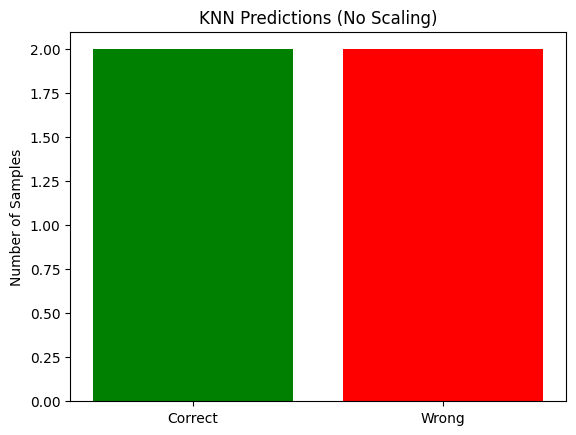

In [7]:
correct = sum(y_test == y_pred_no_scale)
wrong = len(y_test) - correct

plt.bar(["Correct", "Wrong"], [correct, wrong], color=["green", "red"])
plt.title("KNN Predictions (No Scaling)")
plt.ylabel("Number of Samples")
plt.show()


In [8]:
#  Feature Scaling using MinMaxScaler on X values
scaler = MinMaxScaler()

# TO DO
# Apply the train and test set using .fit_transform

#TO DO
#train your model and make prediction as before

#TO DO
# Plot correct and wrong prediction



In [9]:
#  Feature Scaling using MinMaxScaler on X values
scaler_std = StandardScaler()

# TO DO
# Apply the train and test set using .fit_transform

#TO DO
#train your model and make prediction as before

#TO DO
# Plot correct and wrong prediction

## Find the best k values

In [10]:
# Split the data into training, validation, and test sets using X_resampled, y_resampled
X_train, X_t, y_train, y_t= train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val=  train_test_split(X_t, y_t, test_size=0.5)

#  Feature Scaling using MinMaxScaler on X values
scaler = MinMaxScaler()
X_train_scaler= scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test)
X_val_scaler= scaler.transform(X_val)

# find the best value of k using validation set
k_values = [2, 3,4, 5]
validation_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaler, y_train)  # Fit on the training set
    y_val_pred = knn.predict(X_val_scaler)  # Predict on the validation set
    validation_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(validation_accuracy)

best_k = k_values[validation_accuracies.index(max(validation_accuracies))]
print(f"Best k from validation set: {best_k}")

Best k from validation set: 2


## You could also use cross validation from scikit learn : cross_val_score

- The training data (X_train, y_train) is split into some folds (subsets), let say 5.

- For each fold: the model is trained on 4 parts and tested on the remaining 1 part.

- This repeats 5 times (each fold used once as test).


A single train/test split can be misleading (maybe the split was 'too easy' or 'too hard). Cross-validation gives a fairer evaluation by testing on multiple splits.

In [11]:
from sklearn.model_selection import cross_val_score
cv_scores_mean =[]
# Perform cross-validation for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaler, y_train, cv=3)  # 5-fold cross-validation
    cv_scores_mean.append(cv_scores.mean())
    print(f'k={k}, Cross-validation accuracy: {cv_scores.mean()}')


k=2, Cross-validation accuracy: 0.8888888888888888
k=3, Cross-validation accuracy: 0.8888888888888888
k=4, Cross-validation accuracy: 0.611111111111111
k=5, Cross-validation accuracy: 0.611111111111111


In [12]:
####k-NN Classification
k = 2  # enter the value you abtain above
knn = KNeighborsClassifier(n_neighbors=k)
# TO DO, Fit the model here on train set
knn.fit(X_train_scaler, y_train)

#  Make Predictions on train and test sets
# TO DO
y_pred_train= knn.predict(X_train_scaler)
y_pred_test= knn.predict(X_test_scaler)

## Metric for Evaluation

We can use some common metric for evaluation like

- **Accuracy**: The proportion of correctly classified instances.

   $$
   \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
  $$
  
- **Confusion Matrix**: A summary of prediction results showing true positive, true negative, false positive, and false negative counts.

 $$
   \begin{array}{|c|c|c|}
   \hline
   & \text{Predicted Positive} & \text{Predicted Negative} \\
   \hline
   \text{Actual Positive} & TP & FN \\
   \hline
   \text{Actual Negative} & FP & TN \\
   \hline
   \end{array}
  $$


We also have anothers metrics like:

 **Precision**:
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

 **Recall**:
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

 **F1 Score**:
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

  **Log_loss** :

$$
\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^N \left[y_i \log(p_i) + (1 - y_i)\log(1 - p_i)\right]
$$

Where:

- $y_i$ is the true label (0 or 1)

- $p_i$ is the predicted probability for the positive class

- For multi-class classification, it generalizes to:

$$
\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{ij} \log(p_{ij})
$$

Where $M$ is the number of classes, $p_{ij}$ is the predicted probability for class $j$.







Test Accuracy: 0.00
Train Accuracy: 0.88
f1_score: 0.00


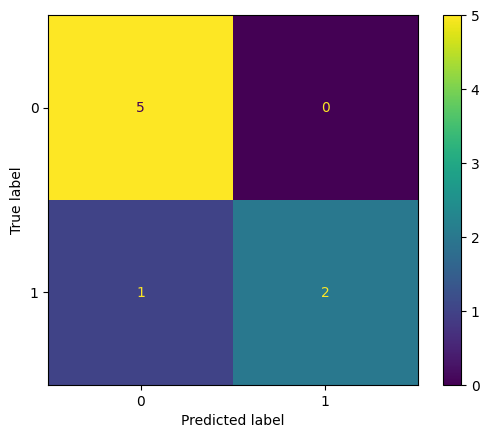

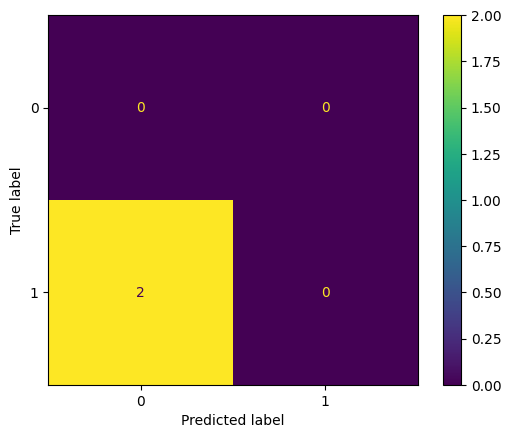

In [13]:
## Compute accuracy using accuracy_score from scikitlearn
#TO DO
train_accuracy= accuracy_score(y_pred_train,y_train)
test_accuracy= accuracy_score(y_pred_test, y_test)

f1 = f1_score(y_pred_test, y_test)


# Print formatted accuracy
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'f1_score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
cmt = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cmt).plot()
ConfusionMatrixDisplay(cm).plot()
plt.show()

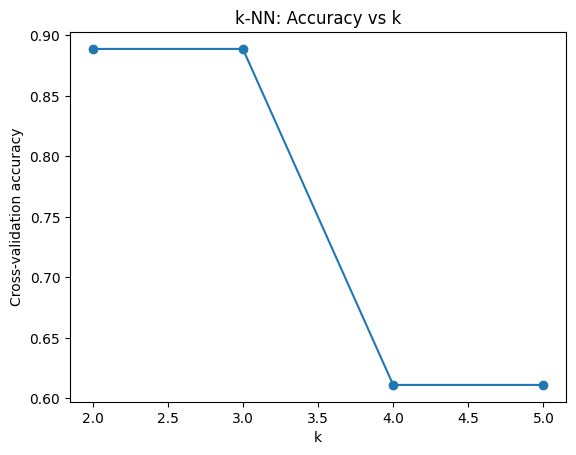

In [14]:
import matplotlib.pyplot as plt

plt.plot(k_values,cv_scores_mean, marker='o')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.title('k-NN: Accuracy vs k')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(


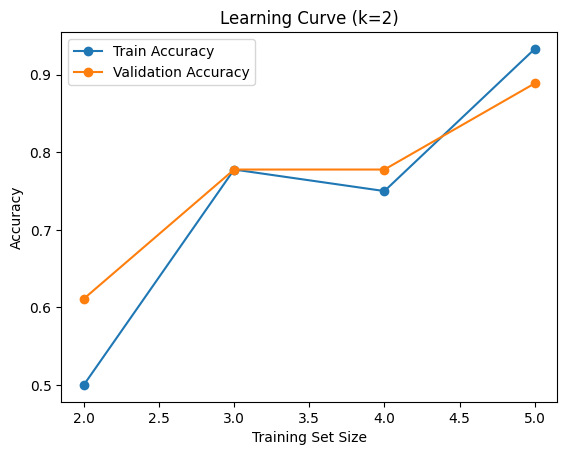

In [15]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train_scaler, y_train, cv=3, train_sizes=np.linspace(0.5, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Train Accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title(f'Learning Curve (k={k})')
plt.legend()
plt.show()


In [16]:
## TO DO (HOMEWORK)

#Plot the accuracy and log loss as in the previous notebook ( the KNN one of last week)